<a href="https://colab.research.google.com/github/chaseScallons/Regression-Practice/blob/main/TF_RegressionANN_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd             # Data preprocessing
import matplotlib.pyplot as plt # Visualization
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
insurance_data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
formatted_ins_data = pd.get_dummies(insurance_data) # One-hot encode dataset

In [4]:
formatted_ins_data.head() 

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
# Create features and labels
X = formatted_ins_data.drop("charges", axis=1)
y = formatted_ins_data["charges"]

In [6]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [7]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
from IPython.testing import test
# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)


In [9]:
from re import VERBOSE
from tensorflow.python import metrics
# Build model
tf.random.set_seed(34)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile model
insurance_model.compile(loss=tf.keras.losses.MAE,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# Fit model
insurance_model.fit(X_train, y_train, epochs=100, verbose=0)


In [10]:
# Evaluate model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 6612.7222 - mae: 6612.7222


[6612.72216796875, 6612.72216796875]

In [11]:
tf.random.set_seed(34)

# Model experimentation (1)
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.MAE,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

# Parameter changed: 
# +1 layer, 100 hidden units
# Optimizer = Adam


In [12]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5238.8677 - mae: 5238.8677


[5238.86767578125, 5238.86767578125]

In [13]:
tf.random.set_seed(34)

# Model experimentaion (2)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.MAE,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history = insurance_model_3.fit(X_train, y_train, epochs= 200, verbose=0)

In [14]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3953.8303 - mae: 3953.8303


[3953.830322265625, 3953.830322265625]

Text(0.5, 0, 'epochs')

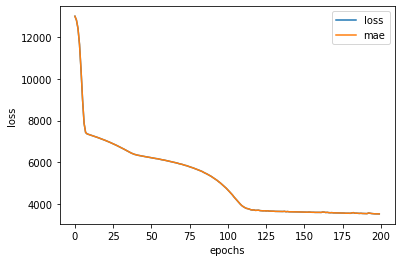

In [15]:
# Plot training history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

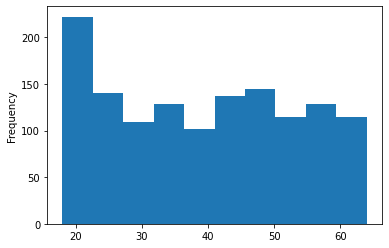

In [16]:
# Normalization / Standardization
X["age"].plot(kind="hist")

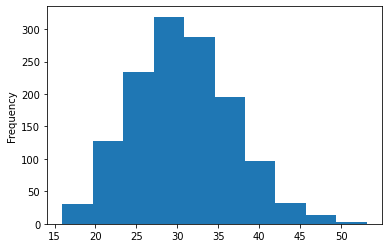

In [17]:
X["bmi"].plot(kind="hist")

In [31]:
# Feature Scaling
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Column Transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Scale the values of these colums to 0 or 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Creaet X and y
X = insurance_data.drop("charges", axis=1)
y = insurance_data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

# Fit column transformer to training data
ct.fit(X_train)

X_train_normalized = ct.transform(X_train)
X_test_normalized = ct.transform(X_test)

In [32]:
# Visualize
X_train.shape, X_train_normalized.shape

((1070, 6), (1070, 11))

In [37]:
# Training a model on normalized data
tf.random.set_seed(34)

# Model Experimentation (3)

insurance_model_normal = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_normal.compile(loss=tf.keras.losses.MAE,
                               optimizer=tf.keras.optimizers.Adam(),
                               metrics=["mae"])

insurance_model_normal.fit(X_train_normalized, y_train, epochs=200, verbose=0)

In [38]:
insurance_model_normal.evaluate(X_test_normalized, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3687.9604 - mae: 3687.9604


[3687.96044921875, 3687.96044921875]